<a href="https://colab.research.google.com/github/Gyawalisahaj/Deeplearn/blob/main/ImageClassificationinCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
classes[9]

'truck'

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]]) # Access the integer value using [0]

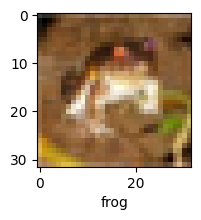

In [11]:
plot_sample(X_train, y_train, 0)

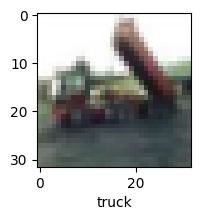

In [12]:
plot_sample(X_train, y_train, 2)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3003 - loss: 1.9338
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4212 - loss: 1.6475
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4570 - loss: 1.5419
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4820 - loss: 1.4819
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4947 - loss: 1.4414


In [16]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4707 - loss: 1.4729


[1.48040771484375, 0.46869999170303345]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.35      0.47      1000
           1       0.59      0.60      0.60      1000
           2       0.44      0.31      0.36      1000
           3       0.29      0.54      0.37      1000
           4       0.55      0.27      0.36      1000
           5       0.44      0.27      0.34      1000
           6       0.53      0.48      0.50      1000
           7       0.53      0.55      0.54      1000
           8       0.61      0.56      0.59      1000
           9       0.39      0.74      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [24]:
cnn = models.Sequential([
     layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4009 - loss: 1.6613
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6179 - loss: 1.0883
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6701 - loss: 0.9404
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6990 - loss: 0.8594
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7279 - loss: 0.7847
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7537 - loss: 0.7109
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7701 - loss: 0.6605
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7884 - loss: 0.6079
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7989 - loss: 0.5705
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8208 - loss: 0.5123


In [27]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7034 - loss: 0.9300


[0.9543694257736206, 0.6967999935150146]

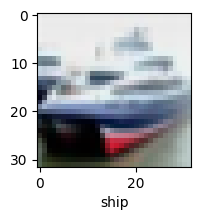

In [30]:
plot_sample(X_test, y_test,1)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.4409634e-04, 1.4703165e-04, 1.0434814e-03, 9.7516137e-01,
        1.4065695e-04, 1.8008629e-02, 5.4081285e-04, 4.8192542e-06,
        4.2793020e-03, 1.2986206e-04],
       [2.1980270e-03, 4.6340019e-02, 1.4990891e-07, 1.4329701e-08,
        7.6976896e-09, 1.7533139e-10, 8.5543048e-09, 2.4505129e-09,
        9.5125985e-01, 2.0199873e-04],
       [3.2718588e-02, 1.2119926e-02, 7.1192684e-05, 3.0171525e-04,
        3.4027398e-04, 1.2876389e-04, 4.6941779e-05, 7.4644158e-05,
        9.5119458e-01, 3.0033470e-03],
       [9.1372621e-01, 6.4099297e-02, 1.8847113e-03, 2.4312550e-04,
        2.2493585e-04, 1.7493228e-06, 8.0915170e-06, 1.8057302e-06,
        1.6615374e-02, 3.1946530e-03],
       [8.3832511e-08, 1.2393147e-06, 8.1843808e-03, 3.4813257e-03,
        1.4806397e-01, 7.4740383e-04, 8.3951855e-01, 2.6970531e-06,
        2.4155150e-07, 7.7237345e-08]], dtype=float32)

In [34]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

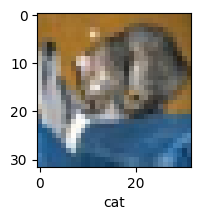

In [38]:
plot_sample(X_test, y_test,0)

In [39]:
classes[y_pred_classes[0]]

'cat'

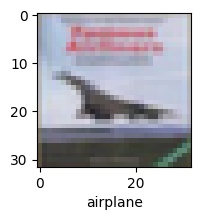

In [40]:
plot_sample(X_test, y_test,3)

In [41]:
classes[y_pred_classes[3]]

'airplane'

In [42]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.80      0.81      0.81      1000
           2       0.64      0.58      0.61      1000
           3       0.51      0.54      0.52      1000
           4       0.65      0.65      0.65      1000
           5       0.66      0.51      0.58      1000
           6       0.79      0.75      0.77      1000
           7       0.75      0.71      0.73      1000
           8       0.78      0.78      0.78      1000
           9       0.67      0.85      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

